#### Завдання.
### Застосуйте описані в презентації до лекції методи кластеризації на *датесеті винних сортів UCI ML Wine Data Set*.

In [1]:
from sklearn import datasets
import pandas as pd


# Load dataframe.
data_wine = datasets.load_wine()

# Read the DataFrame.
df_wine = pd.DataFrame(data_wine.data, columns=data_wine.feature_names)


In [2]:
# Show the first five rows.
df_wine.head()


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [3]:
df_wine.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

In [4]:
# Check for missing, NA and null values.
df_wine.isnull().sum()


alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

### KMenas method

In [5]:
from sklearn.cluster import KMeans


model = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300, random_state=10)
model.fit(df_wine)
prediction = model.predict(df_wine)
print(prediction)


[0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 1
 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 2 1 2 2 1 2 2 1 1 1 2 2 0
 1 2 2 2 1 2 2 1 1 2 2 2 2 2 1 1 2 2 2 2 2 1 1 2 1 2 1 2 2 2 1 2 2 2 2 1 2
 2 1 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 1 2 2 1 1 1 1 2 2 2 1 1 2 2 1 1 2 1
 1 2 2 2 2 1 1 1 2 1 1 1 2 1 2 1 1 2 1 1 1 1 2 2 1 1 1 1 1 2]


#### Visualisation KMenas method

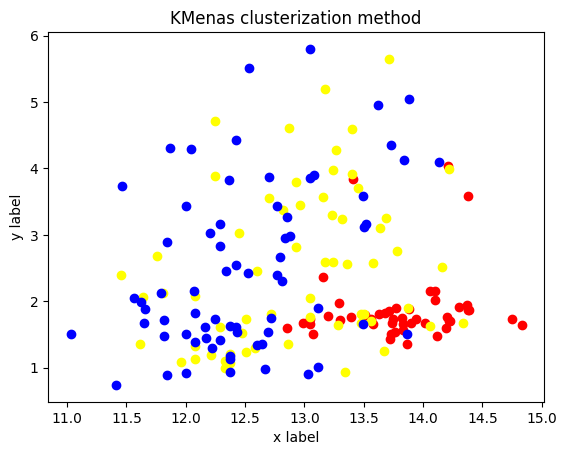

In [6]:
import matplotlib.pyplot as plt


cluster_0 = data_wine.data[prediction == 0]
cluster_1 = data_wine.data[prediction == 1]
cluster_2 = data_wine.data[prediction == 2]

plt.scatter(cluster_0[:,0], cluster_0[:, 1], color='red')
plt.scatter(cluster_1[:,0], cluster_1[:, 1], color='yellow')
plt.scatter(cluster_2[:,0], cluster_2[:, 1], color='blue')

plt.xlabel("x label")
plt.ylabel("y label")
plt.title('KMenas clusterization method')
plt.show()


### DBSCAN method

In [7]:
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA


dbscan = DBSCAN(eps=30, min_samples=4)
dbscan.fit(df_wine)


DBSCAN(eps=30, min_samples=4)

#### Visualisation DBSCAN method

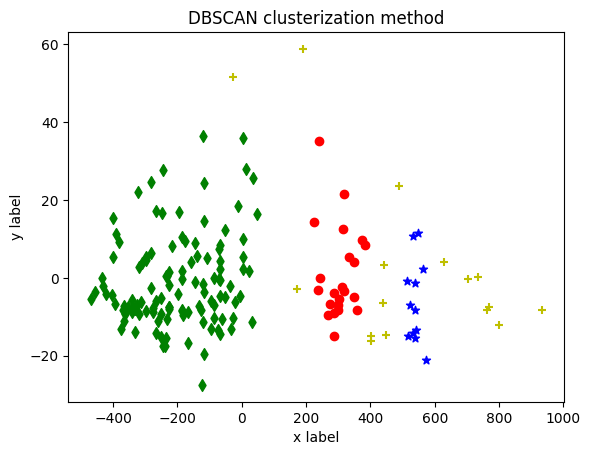

In [8]:
import matplotlib.pyplot as plt


pca = PCA(n_components=2).fit(df_wine)
pca_2d = pca.transform(df_wine)

for i in range(0, pca_2d.shape[0]):
    if dbscan.labels_[i] == 0:
        c1 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='r', marker='o')
    elif dbscan.labels_[i] == 1:
        c2 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='g', marker='d')
    elif dbscan.labels_[i] == 2:
        c3 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='b', marker='*')
    elif dbscan.labels_[i] == -1:
        c4 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='y', marker='+')

plt.xlabel("x label")
plt.ylabel("y label")
plt.title('DBSCAN clusterization method')
plt.show()


### Hierarchy method

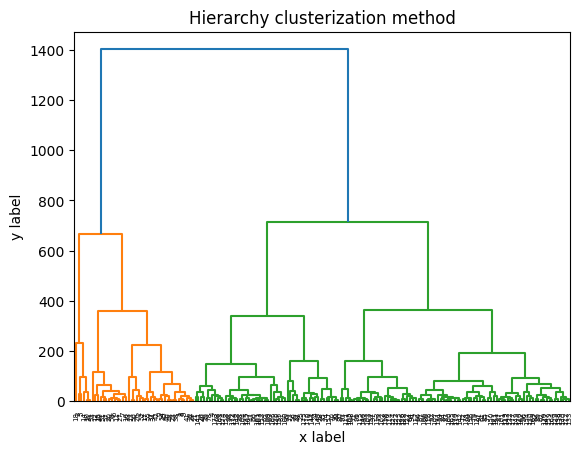

In [9]:
from scipy.cluster.hierarchy import linkage, dendrogram

hierarchy_method = linkage(df_wine, method='complete')
dendrogram(hierarchy_method, leaf_rotation=90)

plt.xlabel("x label")
plt.ylabel("y label")
plt.title('Hierarchy clusterization method')
plt.show()
